# Árvores de decisão para classificação

,Brilho,Tamanho,Classe
0,1.2,23.0,0.0
1,1.1,30.0,0.0
2,0.9,36.0,0.0
3,0.8,45.0,0.0
4,0.8,38.0,0.0
5,0.9,15.0,1.0
6,0.8,20.0,1.0
7,0.8,25.0,1.0
8,0.7,25.0,1.0


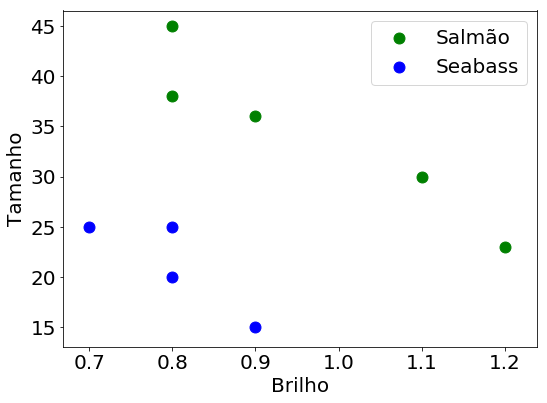

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings("ignore")
import common as com

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

data_table = pd.DataFrame({'Brilho': [1.2, 1.1, 0.9, 0.8, 0.8, 0.9, 0.8, 0.8, 0.7],
                           'Tamanho': [23, 30, 36, 45, 38, 15, 20, 25, 25],
                           'Classe': [0, 0, 0, 0, 0, 1, 1, 1, 1]},
                   dtype='float')

display(data_table)
x = data_table.drop('Classe', axis=1).values
y = data_table['Classe'].values.astype("int")

labels = [0, 1]
label_names = ['Salmão', 'Seabass']
colors = ['green', 'blue']

def plot_data(x, y, marker='o', legend=False, only_data=False):
    plt.rcParams.update({'font.size': com.fontsize})
    for i, label in enumerate(labels):
        if only_data:
            plt.scatter(x[y == label,0], x[y == label,1], label=label_names[label],
                        s=10*com.markersize, marker=marker, color=colors[i])
        else:        
            plt.scatter(x[y == label,0], x[y == label,1], label=label_names[label],
                        s=10*com.markersize, marker=marker, color=colors[i])
    if legend:
        plt.legend()
        
    
fig = plt.figure(figsize=com.figsize)
plot_data(x, y, legend=True)
plt.xlabel("Brilho")
plt.ylabel("Tamanho")
plt.savefig('figs/salmao_seabass_original.png', dpi=com.dpi)
plt.show()
xlim = fig.gca().get_xlim() 
ylim = fig.gca().get_ylim() 

## Árvore de Decisão

In [33]:
tree_classifier = DecisionTreeClassifier()
tree_classifier.fit(x, y)

pred = tree_classifier.predict(x)

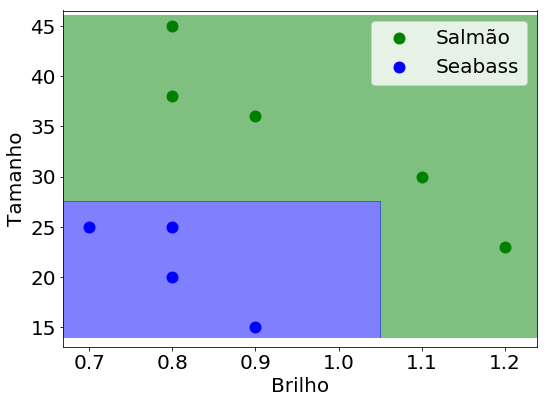

In [43]:
plt.rcParams.update({'font.size': com.fontsize})
fig, ax = plt.subplots(figsize=com.figsize)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
plot_data(x, y, legend=True)
#plot_data(x, y, marker='x', only_data=False, legend=False)
wrong_index = y != pred
ax.scatter(x[wrong_index,0], x[wrong_index,1], s=300, facecolors='none', edgecolors='r', linewidth=3)
xx, yy = com.make_meshgrid(x[:,0], x[:,1])
com.plot_contours(ax, None, lambda x_new, model: np.array(tree_classifier.predict(x_new)), xx, yy, colors)
plt.xlabel("Brilho")
plt.ylabel("Tamanho")    
    
plt.savefig('figs/salmao_seabass.png', dpi=com.dpi)

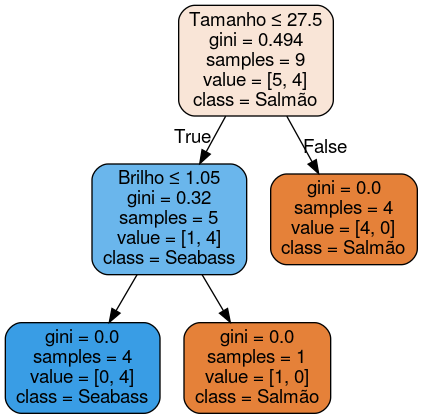

In [39]:
dot_data = StringIO()
export_graphviz(tree_classifier, out_file=dot_data,  
                filled=True, rounded=True, feature_names=['Brilho', 'Tamanho'],
                special_characters=True, class_names=[str(l) for l in label_names])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tree_salmao_seabass.png')
Image(graph.create_png())